<a href="https://colab.research.google.com/github/pramuditha101/ML-Coursework/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import random

In [3]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

data = pd.DataFrame(adult.data.features)
data['income'] = adult.data.targets

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### **Removing rows with 3 null/ missing values**

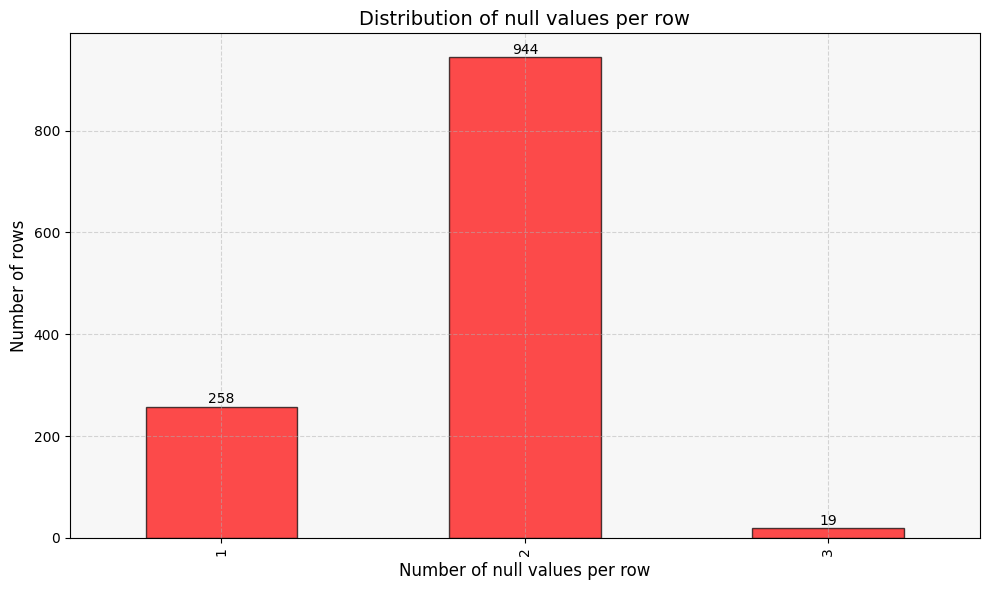

In [4]:
# Calculate the number of null values per row
null_values_per_row = data.isnull().sum(axis=1)

# Filter out rows with zero null values
nonzero_null_values_per_row = null_values_per_row[null_values_per_row > 0]

# Plot the number of rows against the number of null values per row
plt.figure(figsize=(10, 6))
nonzero_null_values_per_row.value_counts().sort_index().plot(kind='bar', color='red', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Number of null values per row', fontsize=12)
plt.ylabel('Number of rows', fontsize=12)
plt.title('Distribution of null values per row', fontsize=14)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Add a background color
plt.gca().set_facecolor('#f7f7f7')

# Add text annotations
for i, v in enumerate(nonzero_null_values_per_row.value_counts().sort_index()):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

In [5]:
null_counts = data.isnull().sum(axis=1)

# Filter out rows with three null values
data = data[null_counts < 3]

missing_values_per_row = data.isnull().sum(axis=1)

# Count rows with more than 3 missing value to reassure
rows_with_multiple_missing_values = (missing_values_per_row == 3).sum()

print("Number of rows with more than one missing value:", rows_with_multiple_missing_values)

Number of rows with more than one missing value: 0


### **Checking the rest of the null values**

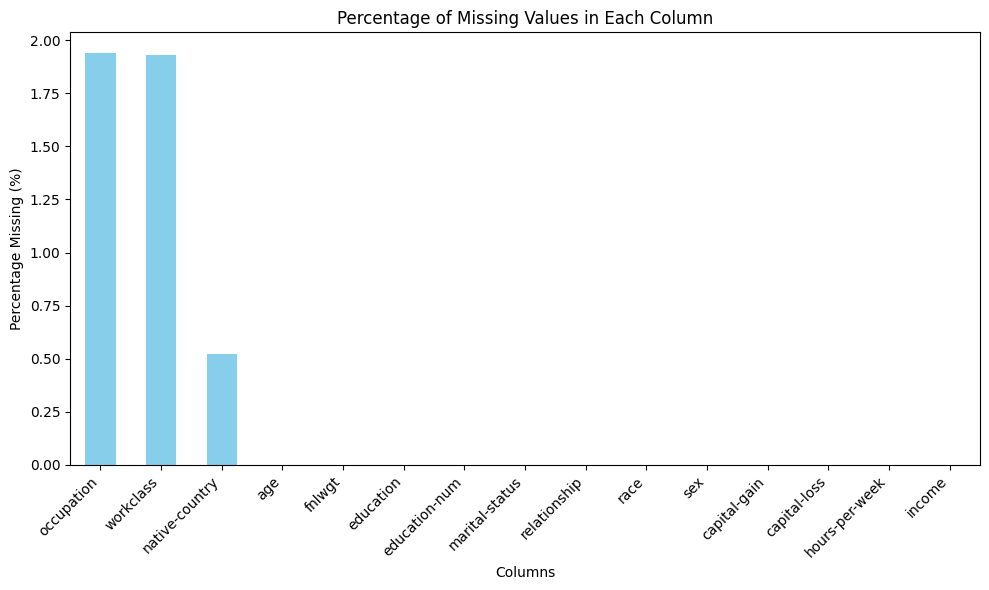

In [6]:
# Calculate percentage of missing values in each column
missing_percentage = (data.isnull().mean() * 100).round(2)

# Sort columns by missing percentage
missing_percentage = missing_percentage.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
data.isnull().sum()

age                 0
workclass         944
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        947
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    255
income              0
dtype: int64

### **Checking if there are any question marks("?")**

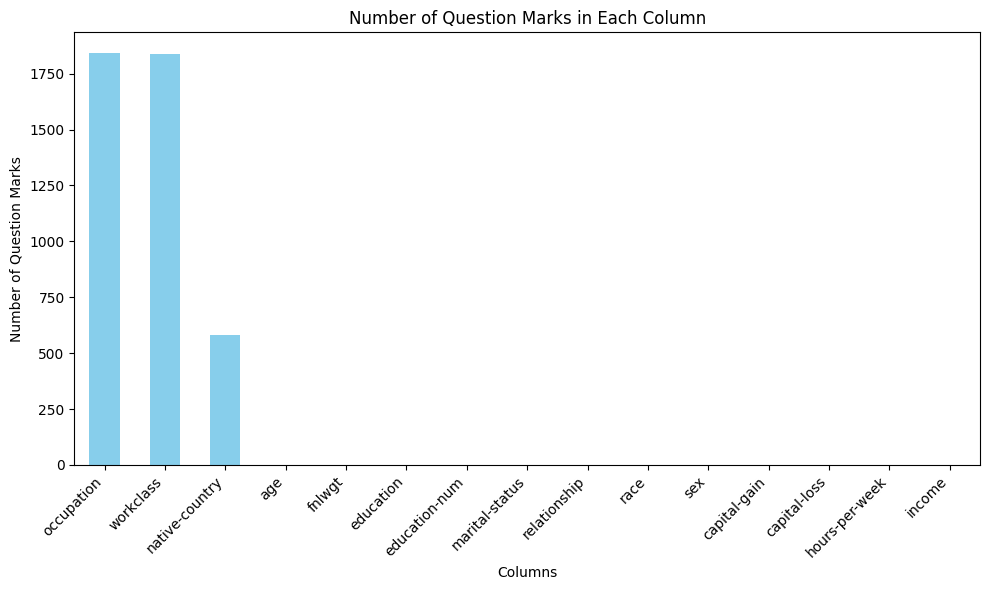

In [8]:
# Count the number of question marks in each column
question_marks_count = (data == '?').sum()

# Sort columns by the count of question marks
question_marks_count = question_marks_count.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(10, 6))
question_marks_count.plot(kind='bar', color='skyblue')
plt.title('Number of Question Marks in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Question Marks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Checking the value count in 'workclass' column and replacing the null values with the mode**

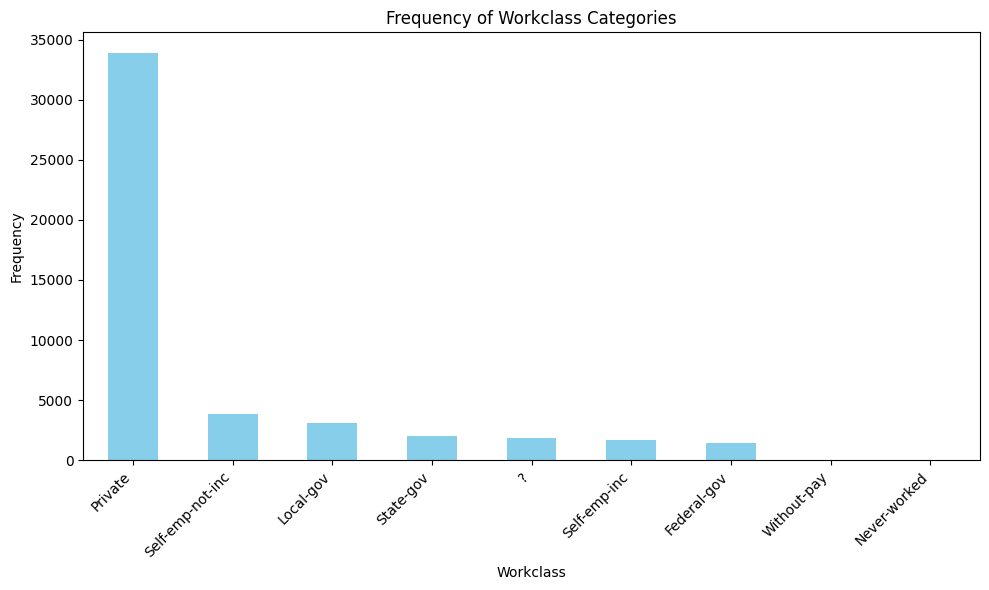

In [9]:
# Get the value counts for the 'workclass' category
workclass_counts = data['workclass'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
workclass_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Workclass Categories')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Replace null values in 'workclass' with 'Private'
data['workclass'].fillna('Private', inplace=True)

# Replace question marks in 'workclass' with 'Private'
data['workclass'].replace('?', 'Private', inplace=True)

workclass_counts = data['workclass'].value_counts()

print("Number of times each value has been used for the 'workclass' category:")
print(workclass_counts)

Number of times each value has been used for the 'workclass' category:
Private             36686
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


### **Checking the value count in 'occupation' column**

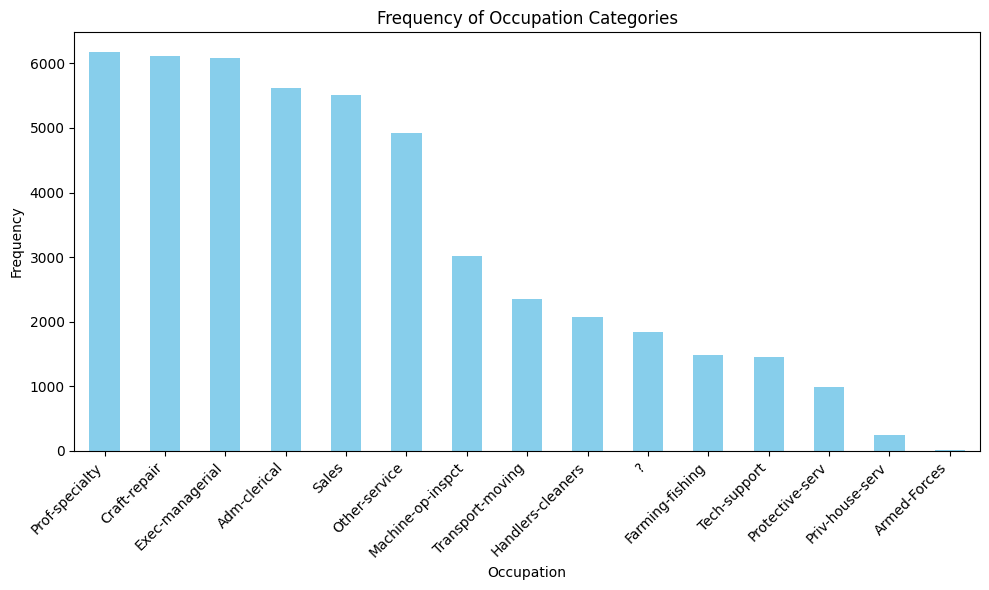

In [11]:
# Get the value counts for the 'workclass' category
occupation_counts = data['occupation'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Occupation Categories')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
#Distributing the null values and '?' in "occupation" column to most frequent classes
data["occupation"] = data["occupation"].fillna("?")
data["occupation"] = data["occupation"].apply(lambda x : random.choice(["Craft-repair", "Prof-specialty", "Exec-managerial"]) if x == "?" else x)

print("Number of times each value has been used for the 'occupation' category:")
data["occupation"].value_counts()

Number of times each value has been used for the 'occupation' category:


Prof-specialty       7126
Craft-repair         7037
Exec-managerial      6997
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

### **Checking the value count in 'native-country' column and replacing the null values with the mode**

<ipython-input-13-a0a777951cd5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="native-country", data=data, order = data['native-country'].value_counts().index[:20], palette='viridis')


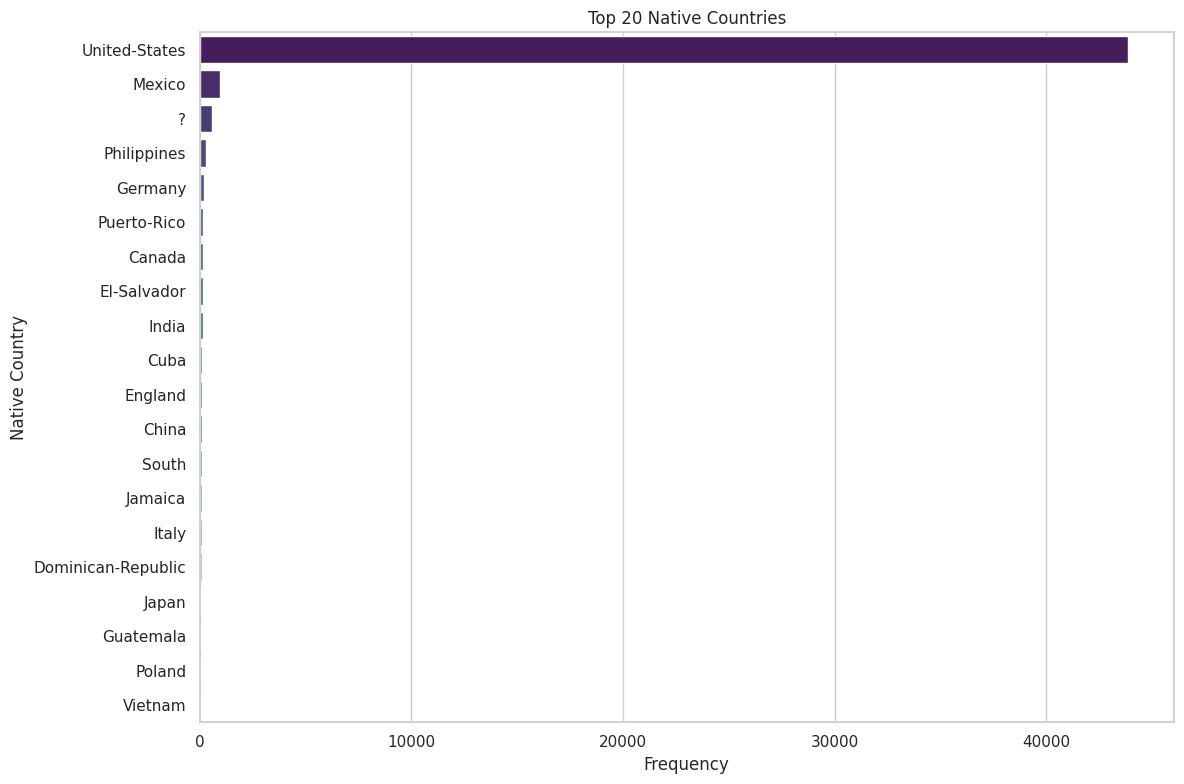

In [13]:
# Set the style
sns.set(style="whitegrid")

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.countplot(y="native-country", data=data, order = data['native-country'].value_counts().index[:20], palette='viridis')
plt.title('Top 20 Native Countries')
plt.xlabel('Frequency')
plt.ylabel('Native Country')
plt.tight_layout()
plt.show()

In [14]:
# Replace null values in 'native-country' with 'United-States'
data['native-country'].fillna('United-States', inplace=True)

# Replace question marks in 'native-country' with 'United-States'
data['native-country'].replace('?', 'United-States', inplace=True)

native_country_counts = data['native-country'].value_counts()

print("Number of times each value has been used for the 'native-country' category:")
print(native_country_counts)

Number of times each value has been used for the 'native-country' category:
United-States                 44670
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua               

In [15]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

**Checking the value counts in 'income' column**

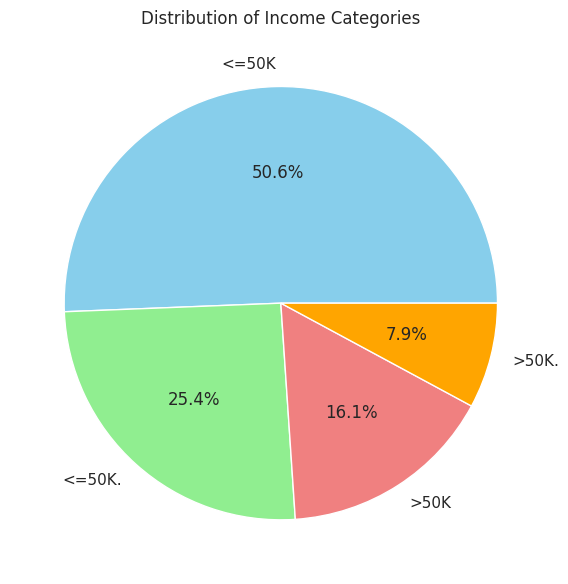

In [16]:
# Get the value counts for the 'income' category
income_counts = data['income'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Distribution of Income Categories')
plt.tight_layout()
plt.show()

In [17]:
# Replace question marks in 'income' with 'Private'
data['income'].replace('<=50K.', '<=50K', inplace=True)

# Replace question marks in 'income' with 'Private'
data['income'].replace('>50K.', '>50K', inplace=True)


income_counts = data['income'].value_counts()

print("Number of times each value has been used for the 'income' category:")
print(income_counts)

Number of times each value has been used for the 'income' category:
<=50K    37138
>50K     11685
Name: income, dtype: int64


**Plotting a heat-map to visualize other columns with target('income')**

<ipython-input-18-27310cbe298a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


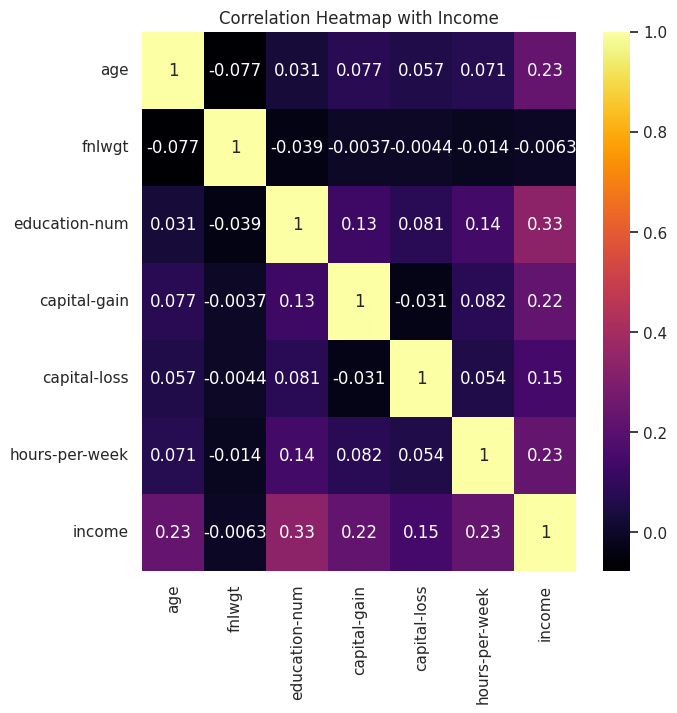

In [18]:
# Convert income column to numeric
data['income'] = data['income'].astype('category').cat.codes

# Calculate Pearson correlation coefficients
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Heatmap with Income')
plt.show()

**Displaying the correlation with the target**

In [19]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate Pearson correlation coefficients with income
correlation_with_income = data[numerical_columns].corrwith(data['income'].astype('category').cat.codes)

# Print correlation coefficients
print("Correlation with income:")
print(correlation_with_income)

Correlation with income:
age               0.230376
fnlwgt           -0.006323
education-num     0.332687
capital-gain      0.223023
capital-loss      0.147547
hours-per-week    0.227819
dtype: float64


**Dropping the 'fnlwgt' and 'education' columns**

In [20]:
# Drop the 'fnlwgt' and 'education' columns
data.drop(columns=['fnlwgt','education'], inplace=True)
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,Private,9,Widowed,Exec-managerial,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


## **Label Encoding**

In [21]:
from sklearn.preprocessing import LabelEncoder

# Extract categorical columns (excluding the target variable, assuming 'income' is the target)
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,13,0,9,1,4,0,0,0,36,38,0
48838,64,3,9,6,3,2,2,1,0,0,40,38,0
48839,38,3,13,2,9,0,4,1,0,0,50,38,0
48840,44,3,13,0,0,3,1,1,5455,0,40,38,0


## **Over-sampling process**

<ipython-input-22-baecdd468cae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_counts.index, y=income_counts.values, palette='viridis')


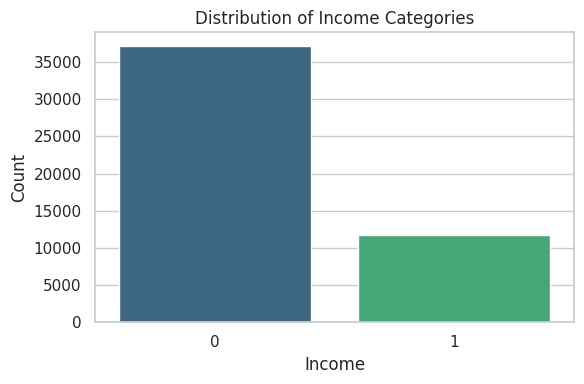

In [22]:
# Get the value counts for the 'income' category
income_counts = data['income'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=income_counts.index, y=income_counts.values, palette='viridis')
plt.title('Distribution of Income Categories')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [23]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = data.drop(columns=['income'])
y = data['income']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data into a DataFrame
data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['income'])], axis=1)

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

data["income"].value_counts()

1    37138
0    37138
Name: income, dtype: int64

## **Min-Max Scaling**

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Extract numerical columns (excluding the target variable)
numerical_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()

# Apply Min-Max scaling to numerical columns
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.479452,0.428571,0.533333,0.333333,0.692308,0.0,1.0,1.0,0.000000,0.000000,0.428571,0.950,1
1,0.410959,0.428571,0.133333,0.833333,0.846154,0.8,1.0,0.0,0.000000,0.000000,0.397959,0.625,0
2,0.821918,0.857143,1.000000,0.500000,0.692308,0.2,1.0,1.0,0.000000,0.000000,0.030612,0.950,1
3,0.205479,0.428571,0.600000,0.666667,0.461538,0.4,1.0,0.0,0.000000,0.506198,0.397959,0.350,0
4,0.424658,0.428571,0.533333,0.333333,0.153846,0.0,1.0,1.0,0.076881,0.000000,0.397959,0.950,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74271,0.534247,0.428571,0.800000,0.666667,0.692308,0.8,1.0,0.0,0.000000,0.000000,0.193878,0.950,0
74272,0.630137,0.714286,0.200000,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.000000,0.295918,0.950,0
74273,0.356164,0.428571,0.800000,0.166667,0.230769,0.0,1.0,0.0,0.000000,0.000000,0.448980,0.950,1
74274,0.013699,0.428571,0.400000,0.666667,0.000000,0.6,1.0,0.0,0.000000,0.000000,0.193878,0.950,0


### **Splitting the dataset for training**

In [25]:
x = data.drop('income', axis=1)  # Assuming the target variable is named 'income'
y = data['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=43)

# **Naive Bayes Classification**

In [26]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate the Bernoulli Naive Bayes model
naive_bayes = BernoulliNB()

# Train the model
naive_bayes.fit(x_train, y_train)

# Make predictions
naive_bayes_pred = naive_bayes.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, naive_bayes_pred)

0.7529506798904995

In [27]:
from sklearn.metrics import classification_report
print(classification_report(naive_bayes_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10037
           1       0.80      0.73      0.76     12246

    accuracy                           0.75     22283
   macro avg       0.75      0.76      0.75     22283
weighted avg       0.76      0.75      0.75     22283



**Cross Validation for naive bayes**

In [28]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(naive_bayes, x, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.74905762 0.74210703 0.75583978 0.74419387 0.7497139 ]
Mean cross-validation score: 0.748182442845913


**Training accuracy of naive bayes**

In [29]:
# Validating with training accuracy
naive_bayes_pred = naive_bayes.predict(x_train)

accuracy_score(y_train, naive_bayes_pred)

0.7465812705556517

In [30]:
from sklearn.naive_bayes import GaussianNB

# Naïve Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naive_bayes_pred = naive_bayes.predict(x_test)

from sklearn.metrics import accuracy_score,r2_score
accuracy = accuracy_score(y_test, naive_bayes_pred)
r2_val = r2_score(y_test, naive_bayes_pred)
print(f"The accuracy score is {accuracy}")
print(f"The r2 score is {r2_val}")

The accuracy score is 0.7019701117443792
The r2 score is -0.19217575813578947


# **Random Forest Classification**

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
random_forest = RandomForestClassifier(random_state=42, max_depth=20, min_samples_split=10, n_estimators=100, criterion="gini")
random_forest.fit(x_train, y_train)
random_forest_pred = random_forest.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, random_forest_pred)

0.8754207243189875

In [40]:
from sklearn.metrics import classification_report
print(classification_report(random_forest_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     10330
           1       0.91      0.85      0.88     11953

    accuracy                           0.88     22283
   macro avg       0.88      0.88      0.88     22283
weighted avg       0.88      0.88      0.88     22283



In [41]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(random_forest, x, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.87143242 0.86718277 0.8766072  0.87512622 0.87290475]
Mean cross-validation score: 0.8726506707180361


**Training Accuracy**

In [38]:
random_forest_pred = random_forest.predict(x_train)

accuracy_score(y_train, random_forest_pred)

0.8991018021656761